## Grid Search Hyperparameter optimization

This case study is all about using grid searches to identify the optimal parameters for a machine learning algorithm. To complere this case study, you'll use the Pima Indian diabetes dataset from Kaggle and KNN. Follow along with the preprocessing steps of this case study.

Load the necessary packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# set random seed to try make this exercise and solutions reproducible (NB: this is just for teaching purpose and not something you would do in real life)
random_seed_number = 42
np.random.seed(random_seed_number)
import warnings
warnings.filterwarnings("ignore")

#### Load the diabetes data

In [2]:
diabetes_data = pd.read_csv('/Users/mingao/Desktop/GridSearchKNN_Case_Study/data/diabetes.csv')
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
diabetes_data.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

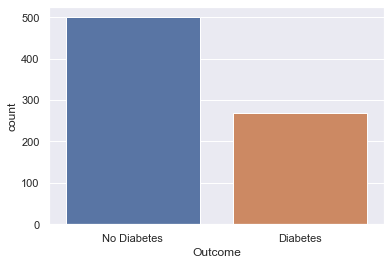

In [4]:
g = sns.countplot(diabetes_data['Outcome'])
g.set_xticklabels(['No Diabetes', 'Diabetes']);

In [5]:
class_count_0, class_count_1 = diabetes_data.Outcome.value_counts()
class_0 = diabetes_data[diabetes_data['Outcome'] == 0]
class_1 = diabetes_data[diabetes_data['Outcome'] == 1]


In [6]:
class_0_under = class_0.sample(class_count_1)
test_under = pd.concat([class_0_under, class_1], axis = 0)
test_under.Outcome.value_counts()

0    268
1    268
Name: Outcome, dtype: int64

**<font color='teal'> Start by reviewing the data info.</font>**

In [7]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**<font color='teal'> Apply the describe function to the data.</font>**

In [8]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**<font color='teal'> Currently, the missing values in the dataset are represented as zeros. Replace the zero values in the following columns ['Glucose','BloodPressure','SkinThickness','Insulin','BMI'] with nan .</font>**

In [9]:
diabetes_data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = \
diabetes_data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0, np.nan)

**<font color='teal'> Plot histograms of each column. </font>**

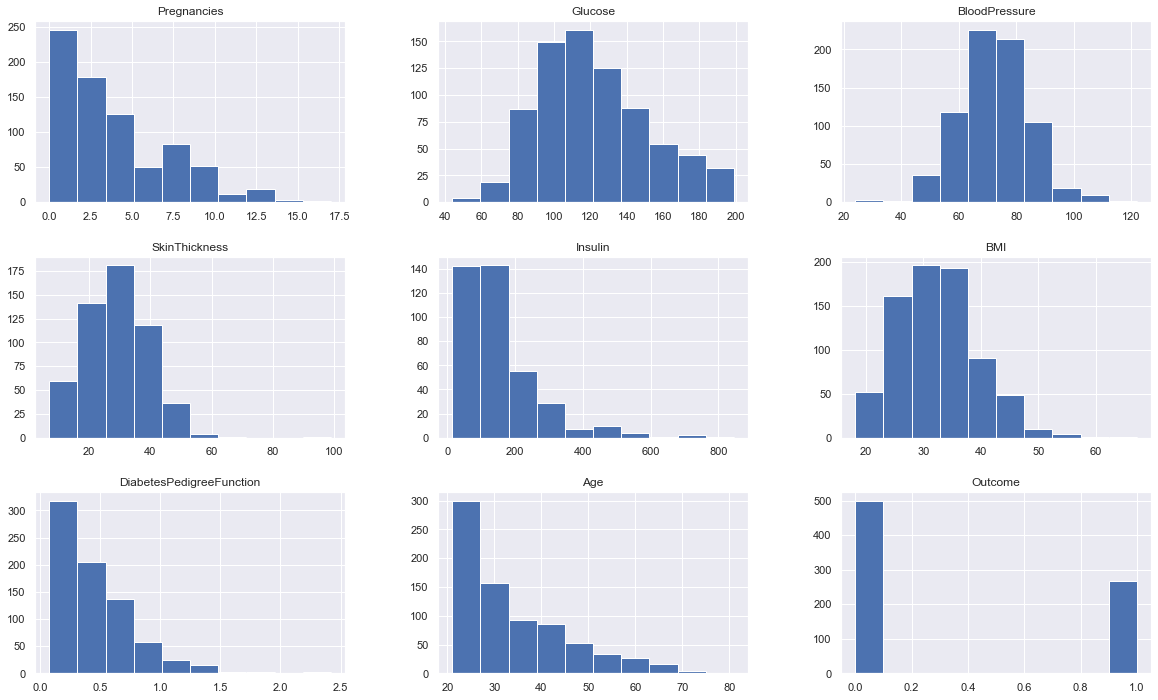

In [10]:
diabetes_data.hist(figsize = (20,12));

#### Replace the zeros with mean and median values.

<div class="alert alert-danger">

how to decide which one to be replaced with mean and which one to replaced with median? : maybe try to replace all with mean and model, then try all with median and then model. Then randomaly pick one as median and keep others as mena and run the model to see any difference 

In [11]:
diabetes_data['Glucose'].fillna(diabetes_data['Glucose'].mean(), inplace = True)
diabetes_data['BloodPressure'].fillna(diabetes_data['BloodPressure'].mean(), inplace = True)
diabetes_data['SkinThickness'].fillna(diabetes_data['SkinThickness'].median(), inplace = True)
diabetes_data['Insulin'].fillna(diabetes_data['Insulin'].median(), inplace = True)
diabetes_data['BMI'].fillna(diabetes_data['BMI'].median(), inplace = True)

**<font color='teal'> Plot histograms of each column after replacing nan. </font>**

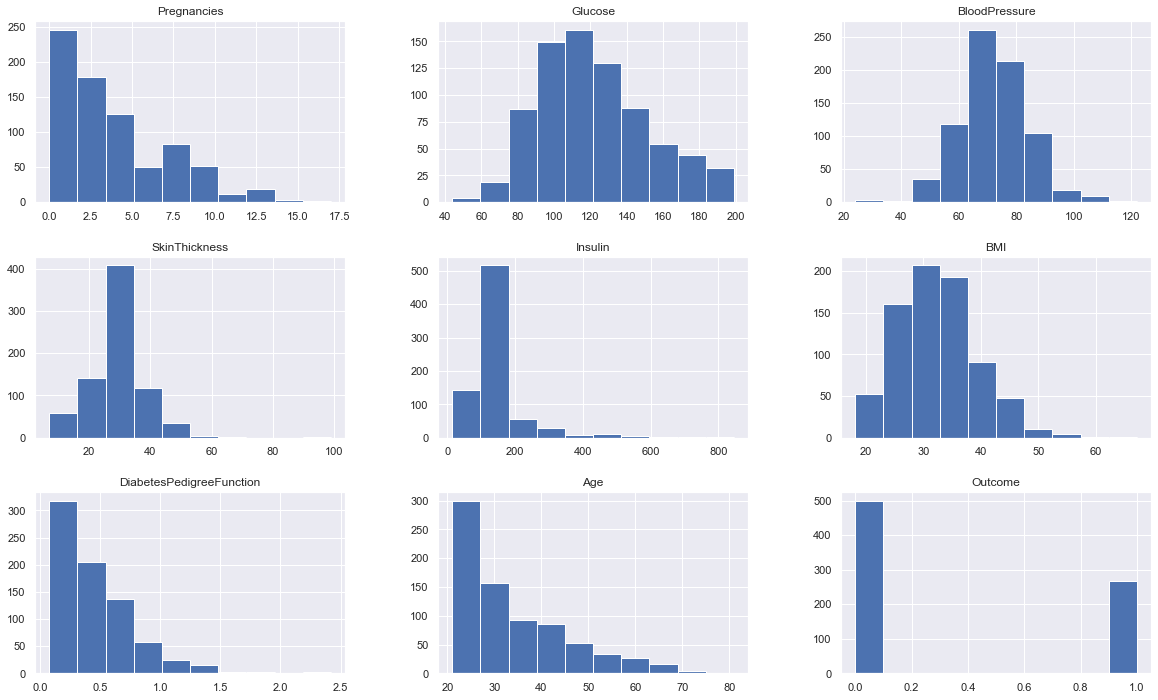

In [12]:
diabetes_data.hist(figsize = (20,12));

#### Plot the correlation matrix heatmap

Correlation between various features


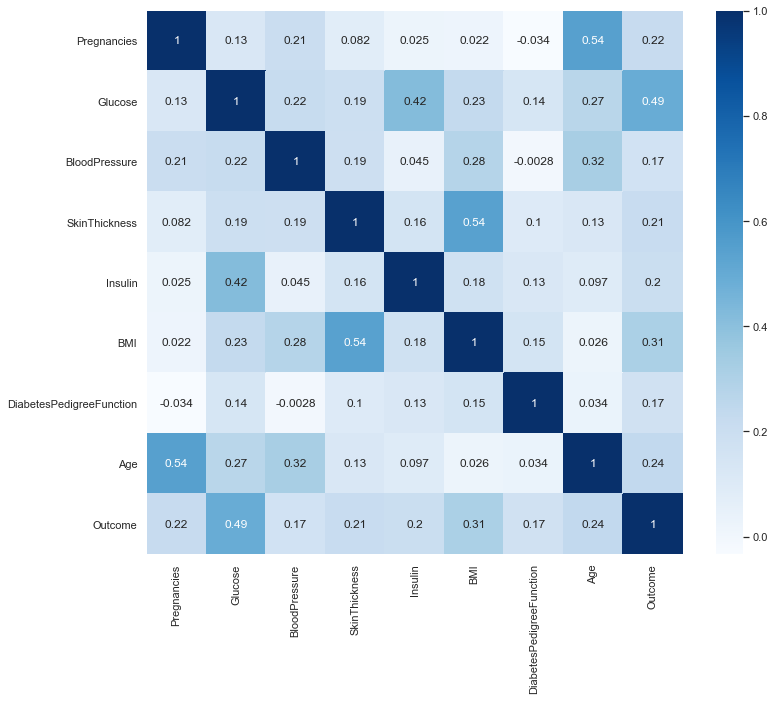

In [13]:
plt.figure(figsize=(12,10))
print('Correlation between various features')
p=sns.heatmap(diabetes_data.corr(), annot=True,cmap ='Blues')

**<font color='teal'> Define the `y` variable as the `Outcome` column.</font>**

In [14]:
y = diabetes_data[['Outcome']]

In [15]:
X = diabetes_data.drop(['Outcome'], axis = 1)
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33


**<font color='teal'> Create a 70/30 train and test split. </font>**

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

**<font color='teal'> Using Sklearn, standarize the magnitude of the features by scaling the values. </font>**

Note: Don't forget to fit() your scaler on X_train and then use that fitted scaler to transform() X_test. This is to avoid data leakage while you standardize your data.

In [17]:
from sklearn.preprocessing import StandardScaler

SS = StandardScaler().fit(X_train)
X_train = SS.transform(X_train)
X_test = SS.transform(X_test)


#### Using a range of neighbor values of 1-10, apply the KNearestNeighbor classifier to classify the the data.

In [18]:
from sklearn.neighbors import KNeighborsClassifier


test_scores = []
train_scores = []

for i in range(1,10):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

**<font color='teal'> Print the train and test scores for each iteration.</font>**

In [19]:
for i in range(len(train_scores)):
    print ('For K =', i+1, 'test_score is',round(test_scores[i],2), 'train_score is', round(train_scores[i],2))

For K = 1 test_score is 0.67 train_score is 1.0
For K = 2 test_score is 0.67 train_score is 0.85
For K = 3 test_score is 0.67 train_score is 0.85
For K = 4 test_score is 0.69 train_score is 0.84
For K = 5 test_score is 0.7 train_score is 0.84
For K = 6 test_score is 0.68 train_score is 0.82
For K = 7 test_score is 0.73 train_score is 0.83
For K = 8 test_score is 0.74 train_score is 0.82
For K = 9 test_score is 0.73 train_score is 0.83


**<font color='teal'> Identify the number of neighbors that resulted in the max score in the training dataset. </font>**

In [20]:
np.argmax(train_scores)+1

1

**<font color='teal'> Identify the number of neighbors that resulted in the max score in the testing dataset. </font>**

In [21]:
np.argmax(test_scores)+1

8

Plot the train and test model performance by number of neighbors.

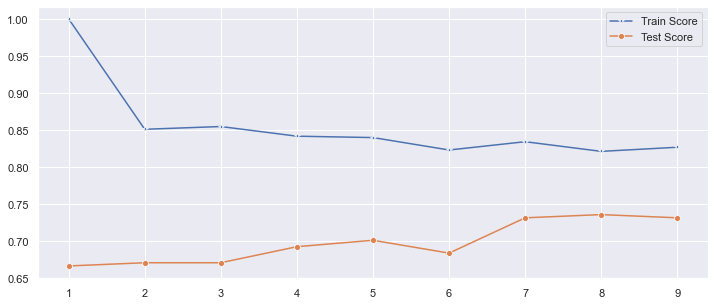

In [22]:
plt.figure(figsize=(12,5))
_ = sns.lineplot(range(1,10),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,10),test_scores,marker='o',label='Test Score')

**<font color='teal'> Fit and score the best number of neighbors based on the plot. </font>**

<div class="alert alert-danger">

which K is the best, 7 or 8?

In [23]:
knn = KNeighborsClassifier(7).fit(X_train, y_train)

In [24]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
pl = confusion_matrix(y_test,y_pred)

**<font color='teal'> Plot the confusion matrix for the model fit above. </font>**

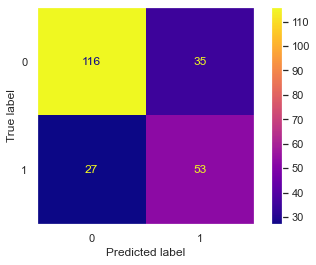

In [25]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(pl, knn.classes_)
disp.plot(cmap = 'plasma')
plt.grid(False)
plt.show()


**<font color='teal'> Print the classification report </font>**

<div class="alert alert-danger">

why the report looks weird(difficult to read): call the print() function since classification_report returns string

In [26]:
from sklearn.metrics import classification_report
label_names = ['label 0', 'label 1']
print(classification_report(y_test, y_pred, target_names = label_names))


              precision    recall  f1-score   support

     label 0       0.81      0.77      0.79       151
     label 1       0.60      0.66      0.63        80

    accuracy                           0.73       231
   macro avg       0.71      0.72      0.71       231
weighted avg       0.74      0.73      0.73       231



#### In the case of the K nearest neighbors algorithm, the K parameter is one of the most important parameters affecting the model performance.  The model performance isn't horrible, but what if we didn't consider a wide enough range of values in our neighbors for the KNN? An alternative to fitting a loop of models is to use a grid search to identify the proper number. It is common practice to use a grid search method for all adjustable parameters in any type of machine learning algorithm. First, you define the grid — aka the range of values — to test in the parameter being optimized, and then compare the model outcome performance based on the different values in the grid.

#### Run the code in the next cell to see how to implement the grid search method for identifying the best parameter value for the n_neighbors parameter. Notice the param_grid is the range value to test and we apply cross validation with five folds to score each possible value of n_neighbors.

In [27]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

#### Print the best score and best parameter for n_neighbors.

In [28]:
print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.7951021114572516
Best Parameters: {'n_neighbors': 11}


Here you can see that the ideal number of n_neighbors for this model is 14 based on the grid search performed. 

<div class="alert alert-danger">

why my result is 11 instead of 14? Maybe Springboard used other random_sate number

**<font color='teal'> Now, following the KNN example, apply this grid search method to find the optimal number of estimators in a Randon Forest model.
</font>**

In [29]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [30]:
from sklearn.model_selection import GridSearchCV

param = {'n_estimators': [10, 150, 300, 1000],
         'max_depth': [30, 60, 90, None],
         }
gs = GridSearchCV(rf, param, cv = 5, n_jobs = -1)
gs.fit(X_train, y_train)
pd.DataFrame(gs.cv_results_).sort_values('mean_test_score', ascending = False)[0:5]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
5,1.056263,0.126396,0.057968,0.016948,60,150,"{'max_depth': 60, 'n_estimators': 150}",0.796296,0.777778,0.794393,0.719626,0.785047,0.774628,0.028298,1
2,1.660518,0.323574,0.129518,0.027209,30,300,"{'max_depth': 30, 'n_estimators': 300}",0.824074,0.777778,0.785047,0.719626,0.757009,0.772707,0.034294,2
15,4.542460,0.559481,0.274903,0.015579,None,1000,"{'max_depth': None, 'n_estimators': 1000}",0.805556,0.777778,0.785047,0.700935,0.775701,0.769003,0.035633,3
9,0.921927,0.087413,0.055978,0.021878,90,150,"{'max_depth': 90, 'n_estimators': 150}",0.796296,0.768519,0.766355,0.719626,0.785047,0.767169,0.026195,4
13,0.755198,0.075544,0.050543,0.010127,None,150,"{'max_depth': None, 'n_estimators': 150}",0.796296,0.768519,0.775701,0.719626,0.766355,0.765299,0.025166,5


<div class="alert alert-danger">
try broad range of hyperparameters then narrow down the range to try again to see any improvement

In [33]:
from sklearn.model_selection import GridSearchCV

param = {'n_estimators': [100, 150, 200, 250],
         'max_depth': [30, 60, 90, 120],
         }
gs = GridSearchCV(rf, param, cv = 5, n_jobs = -1)
gs.fit(X_train, y_train)
pd.DataFrame(gs.cv_results_).sort_values('mean_test_score', ascending = False)[0:5]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
5,0.585435,0.054433,0.040167,0.008764,60,150,"{'max_depth': 60, 'n_estimators': 150}",0.833333,0.768519,0.785047,0.719626,0.775701,0.776445,0.036337,1
1,0.613132,0.060615,0.040511,0.004455,30,150,"{'max_depth': 30, 'n_estimators': 150}",0.814815,0.759259,0.794393,0.719626,0.785047,0.774628,0.032789,2
2,0.932834,0.015268,0.088287,0.062240,30,200,"{'max_depth': 30, 'n_estimators': 200}",0.796296,0.777778,0.757009,0.738318,0.794393,0.772759,0.022278,3
15,1.332568,0.268834,0.056448,0.017440,120,250,"{'max_depth': 120, 'n_estimators': 250}",0.796296,0.777778,0.785047,0.719626,0.775701,0.770890,0.026625,4
10,0.788626,0.015377,0.057460,0.003673,90,200,"{'max_depth': 90, 'n_estimators': 200}",0.824074,0.768519,0.766355,0.710280,0.785047,0.770855,0.036684,5


In [34]:
best_grid = gs.best_estimator_
best_grid

RandomForestClassifier(max_depth=60, n_estimators=150)

In [35]:
rf_cv = RandomForestClassifier(max_depth=60, n_estimators=300, random_state = 42).fit(X_train, y_train)
rf_cv.score(X_test, y_test)


0.7489177489177489